# **Functional 모델**

<center><img src = "https://github.com/Jangrae/img/blob/master/carseats2.png?raw=true" width=800/></center>

## **1. 환경준비**

### (1) 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (2) 함수 만들기

In [2]:
# 함수 만들기
def dl_history_plot(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Train Loss', marker='.')
    plt.plot(history['val_loss'], label='Validation Loss', marker='.')

    plt.title('Learning Curve', size=15, pad=20)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

### (3) 데이터 준비

In [3]:
# 데이터 준비
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
data = pd.read_csv(path)
data.drop(columns='Education', inplace=True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


**데이터 설명**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격(단위: 달러)
- Income: 지역 평균 소득(단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산(단위: 1,000달러)
- Population: 지역 인구수(단위: 1,000명)
- Price: 자사 지역별 판매가격
- ShelveLoc: 진열상태
- Age: 지역 인구의 평균 연령
- Urban: 도심 지역 여부(Yes, No)
- US: 매장이 미국에 있는지 여부(Yes, No)

## **2. 데이터 전처리**

### (1) 데이터 준비

In [4]:
# x, y 분리
target = 'Sales'
x = data.drop(columns=target)
y = data.loc[:, target]

### (2) 가변수화

In [5]:
# 가변수화
cat_cols = ['ShelveLoc', 'US', 'Urban']
x = pd.get_dummies(x, columns=cat_cols, drop_first=True, dtype=int)

### (3) 데이터 분할

In [6]:
# 학습용, 검증용 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

### (4) 스케일링

In [7]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## **3. 모델링**

### (1) 모델 선언

#### 1) Sequential 모델

In [8]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures, )),
    Dense(18, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 18)             │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279 (1.09 KB)

 Trainable params: 279 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

#### 2) Functional 모델

In [13]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Layer 선언
il = Input(shape=(nfeatures,))
h1 = Dense(18, activation='relu')(il)
h2 = Dense(4, activation='relu')(h1)
ol = Dense(1)(h2)

# 모델 선언
model = Model(inputs=il, outputs=ol)

# 모델 요약
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 18)             │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279 (1.09 KB)

 Trainable params: 279 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

### (2) 모델 학습

In [14]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [15]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=0).history

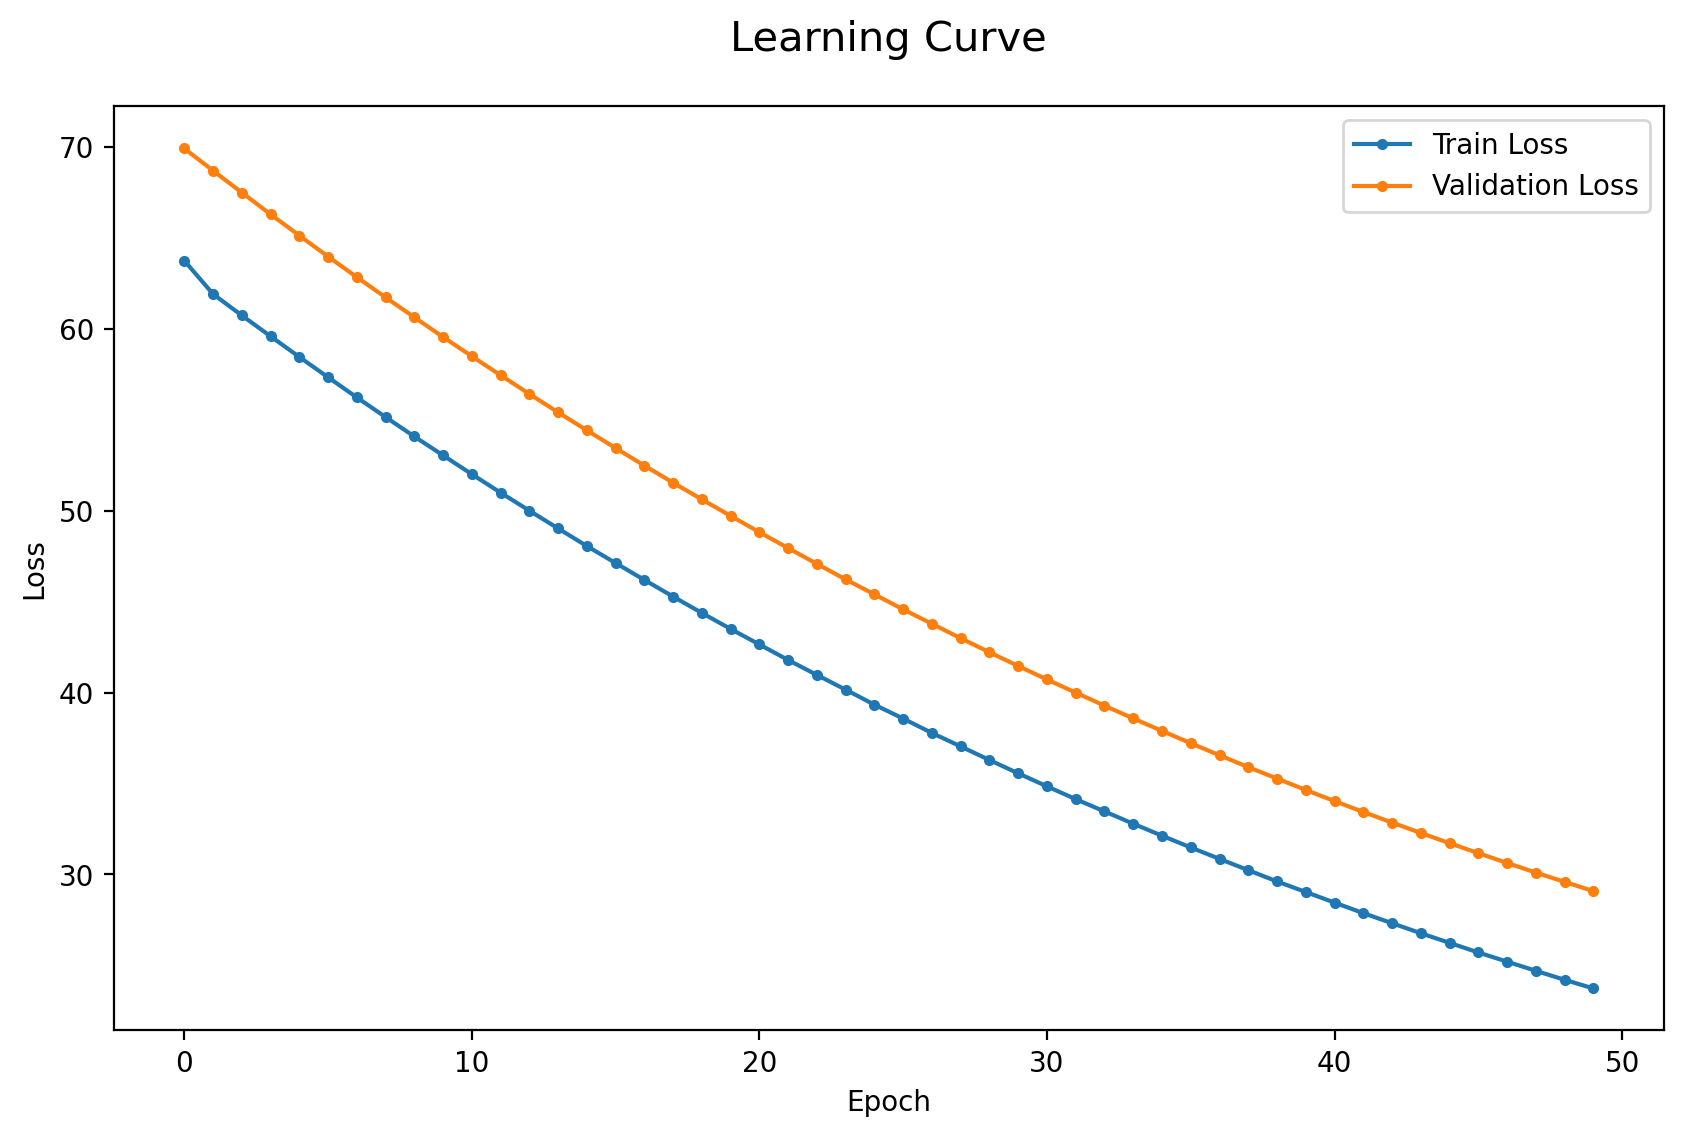

In [16]:
# 학습 곡선
dl_history_plot(hist)

### (3) 예측 및 성능 평가

In [17]:
# 예측
y_pred = model.predict(x_val)

# 성능 평가
print('* MAE:', mean_absolute_error(y_val, y_pred))
print('* R2:', r2_score(y_val, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
* MAE: 4.076176626205444
* R2: -1.6807891479176882


### (4) 실습 1

- Sequential API 코드를 Functional API로 변환해서 수행해 봅니다.

#### 1) Sequential 모델

In [18]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures, )),
    Dense(18, activation='relu'),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 18)             │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299 (1.17 KB)

 Trainable params: 299 (1.17 KB)

 Non-trainable params: 0 (0.00 B)

#### 2) Functional 모델

In [19]:
# 메모리 정리
clear_session

# 입력 Feature 수
nfeature = x_train.shape[1]

# Layer 선언
il = Input(shape=(nfeature,))
h1 = Dense(18, activation='relu')(il)
h2 = Dense(4, activation='relu')(h1)
h3 = Dense(4, activation='relu')(h2)
ol = Dense(1)(h3)

# 모델 선언
model = Model(inputs=il, outputs=ol)

# 모델 요약
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 18)             │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299 (1.17 KB)

 Trainable params: 299 (1.17 KB)

 Non-trainable params: 0 (0.00 B)

### (5) 실습 2

- 다음 구조로 모델링 합니다.
- 단 Functional API를 사용합니다.

<img src = "https://github.com/Jangrae/img/blob/master/model_001.png?raw=true" width=500 align="left"/>

In [24]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeature = x_train.shape[1]

# Layer 선언
il = Input(shape=(18,))
h1 = Dense(10, activation='relu')(il)
h2 = Dense(10, activation='relu')(h1)
h3 = Dense(2, activation='relu')(h2)
ol = Dense(1)(h3)

# 모델 선언
model = Model(inputs=il, outputs=ol)

# 모델 요약
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325 (1.27 KB)

 Trainable params: 325 (1.27 KB)

 Non-trainable params: 0 (0.00 B)